# Z czym się je Gradient Descent?
Gradient Descent to jeden z najprostszych algorytmów znajdywania minimum w funkcji. Jest o tyle fajny, że wybierając punkt w funkcji będzie brał tym większe kroki im dalej jest od minimum, a tym samym tym mniejsze im bliżej tego minimum jest. Daje to fajne efekty obliczeniowe.

## Źródła
+ [https://www.youtube.com/watch?v=xRJCOz3AfYY](https://www.youtube.com/watch?v=xRJCOz3AfYY)
+ [https://www.youtube.com/watch?v=sDv4f4s2SB8](https://www.youtube.com/watch?v=sDv4f4s2SB8)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

''' opisane po co to w ostatnim kroku '''
maxwykresu = 0

## Dataset 
Na dobry początek wybieramy punkty dla których będziemy wyznaczać średnią linię

In [2]:
datapoints = np.array([[1, 2], [3, 1], [4, 4]])

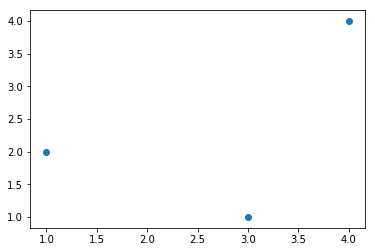

In [3]:
x, y = datapoints.T
plt.scatter(x, y)

## Podstawowe funkcje
Następnie tworzymy funkcje do:
+ przeliczenia wysokości dla punktu bazując na równaniu zwykłej prostej: y=ax+b
+ przeliczenia sum of squared residuals (jeszce nie wiem jak to się po polsku nazywa 😝)

In [4]:
def przelicz_wysokosc_prostej_od_punktu(Afunkcji, Bfunkcji, Xpunktu):
    return Afunkcji*Xpunktu+Bfunkcji

Funkcja ta ma za zadanie zwrócić sumę kwadratów różnicy wysokości między rzeczywistym punktem ze zbioru danych, a otrzymaną wysokością na podstawie podanego równania (również y=ax+b)

In [5]:
def sum_of_squared_residuals(punkty, Afunkcji, Bfunkcji):
    suma = 0
    for punkt in punkty:
        suma = suma + (punkt[1] - przelicz_wysokosc_prostej_od_punktu(Afunkcji, Bfunkcji, punkt[0]))**2
        
    return suma

## Wykres punktów z datasetu oraz przeliczonych z prostej
Zbudujmy wykres.

Na zielono mamy zaznaczone nasze rzeczywiste punkty, a na niebiesko punkty wyliczone z zaproponowanej przez nas funkcji

Funkcja postaci y=ax+b
+ intercept = b
+ slope = a

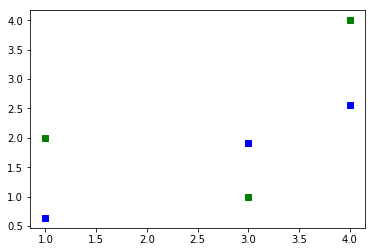

In [6]:
slope = 0.64
intercept = 0

xx, yy = np.array([[item[0], przelicz_wysokosc_prostej_od_punktu(slope, intercept, item[0])] for item in datapoints]).T
plt.plot(x, y, 'gs', xx, yy, 'bs')

Możemy teraz zobrazować wykres funkcji "sum of the squared residuals". Co krok będziemy zwiększać wartość intercept o 0.01, by zauważyć, że w funkcji występuje minimum.

Tip. wiemy, że to funkcja kwadratowa, więc będzie to jedyne minimum tutaj obserwowane. Ramiona w górze 🤪

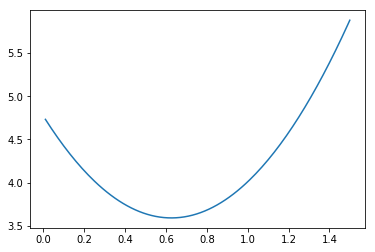

In [7]:
intercept = 0
punkty = []

for x in range(150):
    intercept = intercept + 0.01
    punkty.append([intercept, sum_of_squared_residuals(datapoints, slope, intercept)])
  
    
xxx, yyy = np.array(punkty).T
plt.plot(xxx, yyy)

## Styczna do prostej
Musimy teraz wyznaczyć pochodną dla tej funkcji, co by mieć funkcję, do wyznaczania stycznej na podstawie parametrów: x oraz intercept. Najważniejszym parametrem w tych obliczeniach jest współczynnik kierunkowy stycznej do funkcji. Minimum osiągniemy w momencie, gdy współczynnik będzie wskazywał, że prosta jest prawie pozioma (w obliczeniach stepsize < 0.0001).

### Jak to policzyć
##### Warto skorzystać z "chain rule". 

Bierzemy na początek funkcję, która służyła nam do obliczenia jednego z elementów "sum of squared residuals".

*f = (h - (0.64x + intercept))^2*

Więc nasza pochodna wynosi:

*f' = 2 * (h - (0.64x + intercept))^1 * f'(2h)-f(0.64x)-f(intercept)*

Z tego dostaniemy coś skomplikowanego, ale co by tak nie robić zakładamy, że nasz x oraz h są określonymi liczbami. Otrzymujemy w ten sposób pochodną:

*f'(2h)-f(0.64x)-f(intercept)*

co po założeniu znania x oraz h daje nam:

*f' = 2 * (h - (0.64x + intercept))^1 * (-1)*

więc finalnie

*-2 * (h-(intercept+0.64x))*

In [8]:
def derivative_of_sum_of_squared_residuals(h, x, intercept):
    return -2*(h-(intercept+0.64*x))

## Learning rate
Tutaj tworzymy główną metodę Gradient Descent, czyli zmniejszanie stepu w miarę bycia w pobliżu minimum.

Ważny wzór: *stepsize = suma w jednym kroku * learningrate*

In [9]:
''' tworzymy tablicę punktów do wykresiku '''
pkts = []
''' nadpisujemy intercept z tych poprzednich kroków '''
intercept = 0

''' ustawiamy learning rate '''
learningrate = 1e-3

''' inicjujemy stepsize do rozpoczęcia pętli '''
stepsize = 1

''' inicjujemy counter na 0 '''
''' counter potrzebny do wykresu '''
cnt=0

''' bierzemy wartość absolutną stepsize, ponieważ będzie ona przyjmować wartości ujemne i dodatnie. 
Step może wejśc na zbocze rosnące, przez co będzie musiał przyjąć wartość odwrotną (dodatnią) do standardowej
w czasie przeszukiwania.'''
while abs(stepsize) >= 0.0001:
    suma = 0
    
    for punkt in datapoints:
        suma = suma + derivative_of_sum_of_squared_residuals(punkt[1], punkt[0], intercept)
        
        ''' maxwykresu potrzebujemy, żeby wiedzieć do jakiego punktu printować punkty funkcji '''
        if punkt[0] > maxwykresu:
            maxwykresu = punkt[0]
    
    ''' dodajemy do wykresu '''
    pkts.append([cnt, intercept])
    
    ''' stepsize '''
    stepsize = suma * learningrate
    
    ''' od interceptu odejmujemy stepsize '''
    intercept = intercept - stepsize
    
    cnt=cnt+1
    
print('stepsize', stepsize)
print('intercept', intercept)

stepsize -9.981082297386302e-05
intercept 0.61013134032733


## Opis wykresu
Funkcja powinna na początku szybko rosnąć, a pod koniec wykresu coraz wolniej. Wynika to z zachowania właściwości, że coraz mniejsze kroki robimy na miarę bycia coraz bliżej minimum.

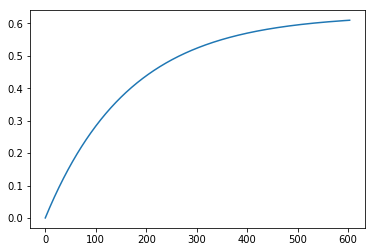

In [10]:
xxxx, yyyy = np.array(pkts).T

plt.plot(xxxx, yyyy)

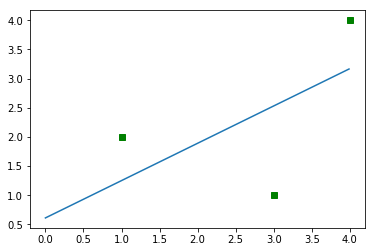

In [11]:
x, y = datapoints.T

prosta = []

for xcnt in range(maxwykresu*100):
    prosta.append([xcnt/100, przelicz_wysokosc_prostej_od_punktu(0.64, intercept, xcnt/100)])   
    
xxxxx, yyyyy = np.array(prosta).T

plt.plot(x, y, 'gs', xxxxx, yyyyy)